In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
# Mount google drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/DataVis_HW1/netflix1.csv')

In [132]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [133]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [134]:
# show count of nan values
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

As we can see we have 3 times more movies then tv shows in our dataset

<Axes: xlabel='type', ylabel='count'>

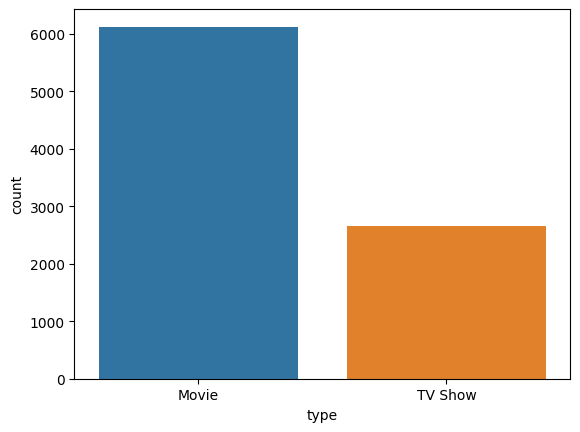

In [135]:
sns.countplot(data=df,x='type')

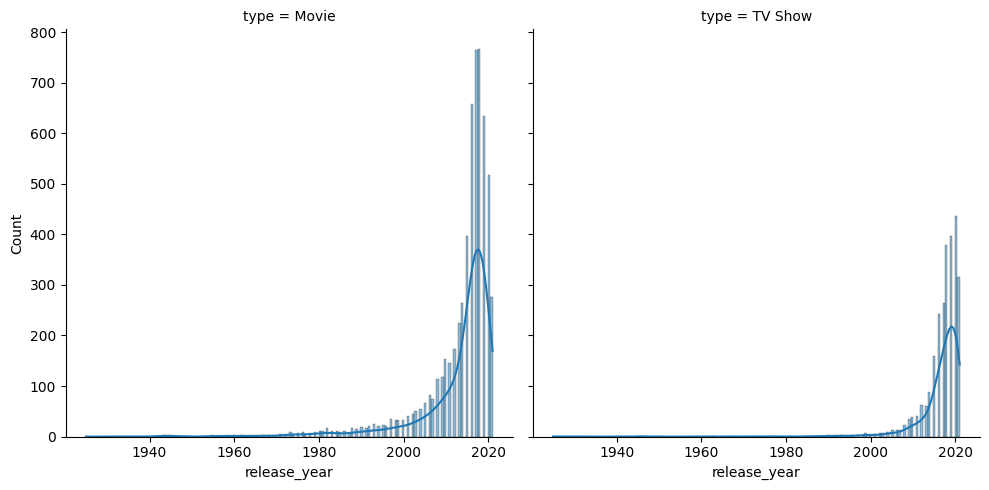

In [138]:
# Realesa date by type
sns.displot(data=df, x='release_year', col='type', kde=True)


In [139]:
top_10_countries=df.country.value_counts().drop("Not Given").iloc[:10].index

[Text(0.5, 1.0, 'Top 10 Countire With Most Contents')]

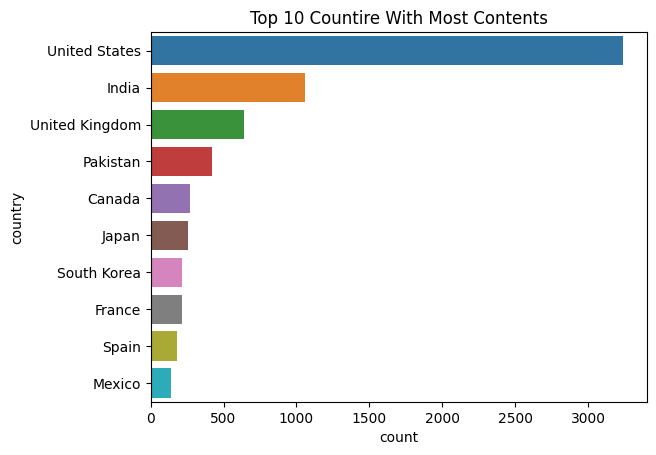

In [140]:
sns.countplot(y="country", data=df,
              order=top_10_countries).set(title="Top 10 Countire With Most Contents")

From the barplot we can see that top content creator is US. 

<Axes: xlabel='count', ylabel='director'>

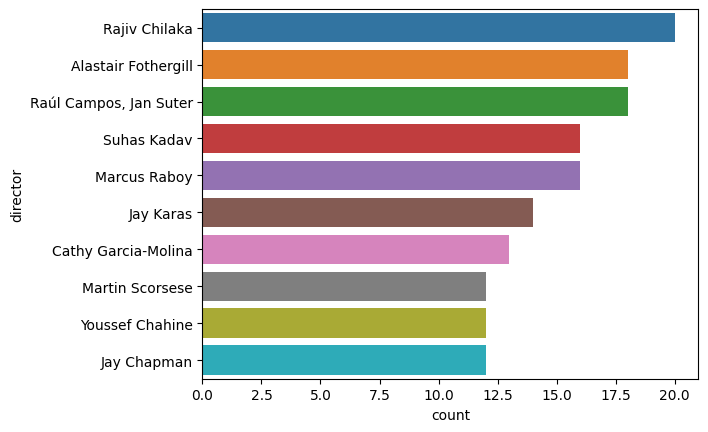

In [141]:
top_10_directors=df.director.value_counts().drop("Not Given").iloc[:10].index
sns.countplot(y="director", data=df,
              order=top_10_directors)

Rajiv Chilaka is the director who made the most films.

[Text(0.5, 1.0, 'Rajiv Chilaka created movies by date')]

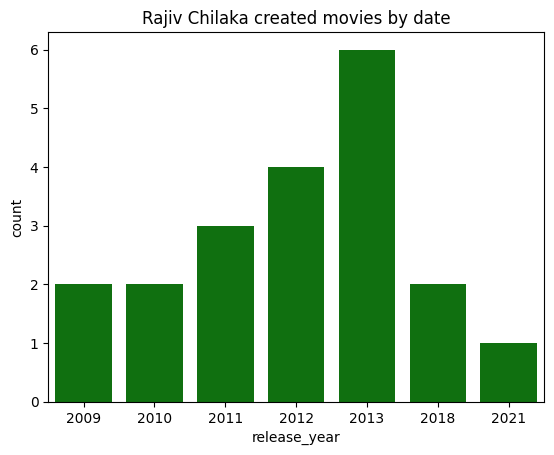

In [143]:
sns.countplot(data = df[df['director'] == 'Rajiv Chilaka'], x ='release_year', color = 'green').set(title = "Rajiv Chilaka created movies by date")

Rajiv Chilaka created movies by date"

In [144]:
dft = df.listed_in.str.split(',', expand=True)

In [145]:
df_genres = pd.concat([dft, dft.T.stack().reset_index(name='Genres')['Genres']], axis=1)

[Text(0.5, 1.0, 'Top 10 Genres')]

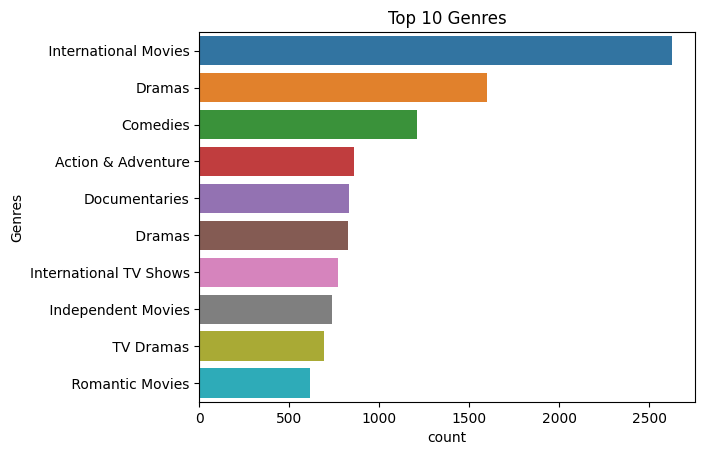

In [147]:
sns.countplot(y ='Genres', order=df_genres.Genres.value_counts().iloc[:10].index, data =df_genres).set(title = "Top 10 Genres")

Top 10 Genres

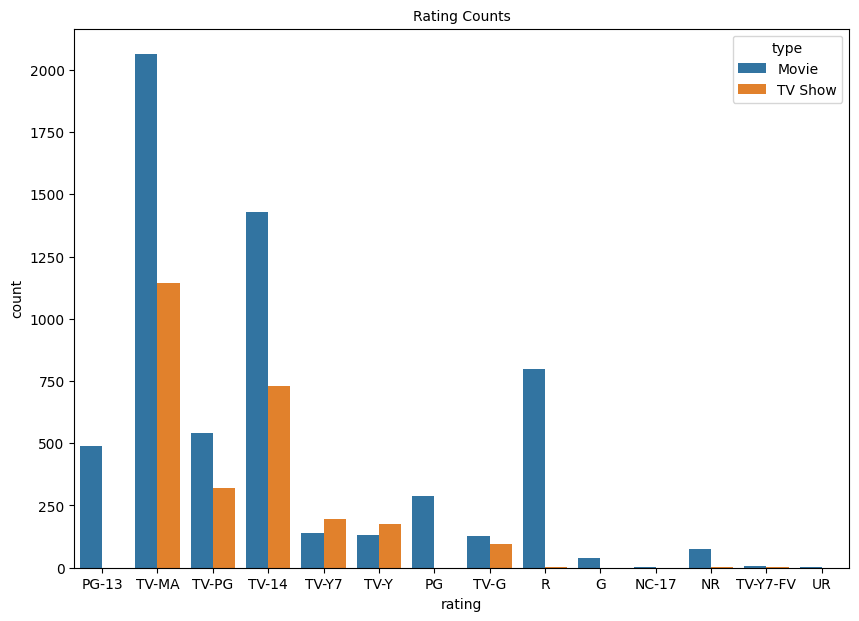

In [148]:
plt.figure(figsize=(10,7))
sns.countplot(x ="rating" ,data = df, hue = "type")
plt.title("Rating Counts", fontsize=10)
plt.show()